In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [2]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_date = '2017_11_30'
exp_names = [
    '2017_11_30_11_23_21_op-time-scan',
    '2017_11_30_11_35_47_op-time-scan-finer'
]

cuts = [[22],[3]]

q = qdp.QDP(base_data_path=dp)
for exp_name in exp_names:
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
    q.load_data_file(experiment_file)
q.set_thresholds(cuts)

name 'fort_exp' is not defined
name 'fort_exp' is not defined


In [3]:
print(q.experiments[0]['variable_list'])
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

[u'rb_op_time_ms']


In [4]:
retention = q.apply_thresholds()

In [5]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.00	retention:0.728 +- 0.030
ivar:	0.15	retention:0.099 +- 0.020
ivar:	0.30	retention:0.107 +- 0.021
ivar:	0.45	retention:0.132 +- 0.023
ivar:	0.60	retention:0.205 +- 0.028
ivar:	0.75	retention:0.225 +- 0.029
ivar:	0.90	retention:0.213 +- 0.028
ivar:	1.05	retention:0.331 +- 0.032
ivar:	1.20	retention:0.272 +- 0.030
ivar:	1.35	retention:0.238 +- 0.029
ivar:	1.50	retention:0.280 +- 0.031
ivar:	0.00	retention:0.735 +- 0.030
ivar:	0.03	retention:0.311 +- 0.032
ivar:	0.06	retention:0.172 +- 0.026
ivar:	0.09	retention:0.126 +- 0.023
ivar:	0.12	retention:0.113 +- 0.022
ivar:	0.15	retention:0.099 +- 0.020
ivar:	0.18	retention:0.106 +- 0.021
ivar:	0.21	retention:0.073 +- 0.018
ivar:	0.24	retention:0.099 +- 0.020
ivar:	0.27	retention:0.106 +- 0.021
ivar:	0.30	retention:0.113 +- 0.022


In [6]:
q.save_experiment_data(filename_prefix='op_time_scan_comparison')

<IPython.core.display.Javascript object>


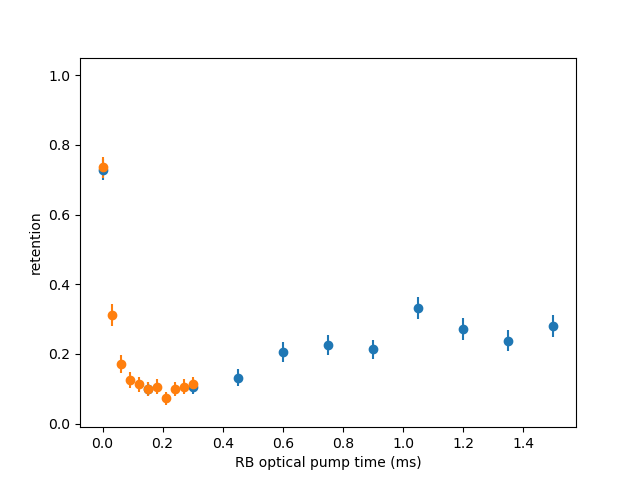

In [7]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'o'
    )
ax.set_ylim(-0.01, 1.05)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'op_time_scan_comparison.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)